In [2]:
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
import keras
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import pandas as pd 

In [3]:
file_1 = "Wine_Data/winequality-red (1).csv"
file_2 = "Wine_Data/winequality-white.csv"

In [4]:
df_1 = pd.read_csv(file_1, sep='\;')

<ipython-input-4-95e77b4bf250>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_1 = pd.read_csv(file_1, sep='\;')


In [5]:
# red = 1 white = 0

In [6]:
# df_1['color']='1'

In [7]:
df_1

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df_2 = pd.read_csv(file_2, sep='\;')

<ipython-input-8-20b7b990e5da>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_2 = pd.read_csv(file_2, sep='\;')


In [9]:
# df_2['color']= '0'

In [10]:
df_2

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
# dataframes = [df_1, df_2]
# result_df = pd.concat(dataframes)

In [12]:
# result_df

In [13]:
from sklearn.preprocessing import QuantileTransformer


In [14]:
# color_dummy = pd.get_dummies(result_df['color'])
# color_dummy

In [15]:
df_1

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
clean_df_r= df_1.rename(columns={'"fixed acidity':'fixed acidity',
           '""volatile acidity""':'volatile acidity',
                    '""citric acid""':'citric acid',
                    '""residual sugar""':'residual sugar',
                    '""chlorides""':'chlorides',
                    '""free sulfur dioxide""':'free sulfure dioxide',
                    '""total sulfur dioxide""':'total sulfur dioxide',
                    '""density""':'density',
                    '""pH""':'pH',
                    '""sulphates""':'sulphates',
                    '""alcohol""':'alcohol',
                    '""quality"""':'quality'})

In [17]:
clean_df_w= df_2.rename(columns={'"fixed acidity':'fixed acidity',
           '""volatile acidity""':'volatile acidity',
                    '""citric acid""':'citric acid',
                    '""residual sugar""':'residual sugar',
                    '""chlorides""':'chlorides',
                    '""free sulfur dioxide""':'free sulfure dioxide',
                    '""total sulfur dioxide""':'total sulfur dioxide',
                    '""density""':'density',
                    '""pH""':'pH',
                    '""sulphates""':'sulphates',
                    '""alcohol""':'alcohol',
                    '""quality"""':'quality'})

In [18]:
clean_df_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [20]:
clean_df_r['best quality']=[1 if x>=7 else 0 for x in clean_df_r.quality]
clean_df_r.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [21]:
clean_df_r['best quality'].unique()

array([0, 1], dtype=int64)

In [22]:
X = clean_df_r.drop(columns ={'quality', 'best quality'}, axis = 1)
y = clean_df_r['best quality']

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfure dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [24]:
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.66770463, -0.28734949, -0.94253451, ..., -0.19632566,
         0.09208801, -0.00834466],
       [ 1.10380585,  0.20506195, -0.35973215, ..., -0.19632566,
        -0.9646345 , -1.22762224],
       [ 0.63140305,  0.99292025, -0.52624711, ..., -0.12946389,
        -0.52433346, -0.41477052],
       ...,
       [ 0.86760445, -0.09038491,  1.55518988, ..., -1.13239039,
         0.35626864,  0.72322189],
       [-0.66770463, -0.38583178, -0.35973215, ..., -0.12946389,
        -0.9646345 ,  0.07294051],
       [ 1.45810795, -0.09038491,  0.13981272, ...,  0.20484494,
         1.23687074, -0.08962983]])

In [26]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.02200673,  0.10657966,  0.6393576 , ..., -0.66435803,
         0.8846299 ,  0.37098615],
       [-1.73061092,  2.47015456, -1.44207939, ...,  0.07112141,
         0.35626864,  2.186355  ],
       [ 0.27710096, -0.28734949,  0.47284264, ...,  0.60601554,
        -0.52433346,  1.37350327],
       ...,
       [-1.14010743, -1.46913694, -0.44298963, ...,  1.60894203,
         1.32493095,  0.23551086],
       [-0.07720114,  0.20506195, -0.35973215, ..., -1.06552862,
        -1.49299576,  1.94249948],
       [ 0.63140305, -0.28734949,  0.2230702 , ...,  0.00425964,
        -0.43627325,  0.23551086]])

k: 1, Train/Test Score: 1.000/0.813
k: 3, Train/Test Score: 0.885/0.787
k: 5, Train/Test Score: 0.849/0.777
k: 7, Train/Test Score: 0.832/0.771
k: 9, Train/Test Score: 0.819/0.772
k: 11, Train/Test Score: 0.813/0.767
k: 13, Train/Test Score: 0.809/0.775
k: 15, Train/Test Score: 0.802/0.773
k: 17, Train/Test Score: 0.804/0.776
k: 19, Train/Test Score: 0.802/0.771
k: 21, Train/Test Score: 0.798/0.770
k: 23, Train/Test Score: 0.799/0.767
k: 25, Train/Test Score: 0.798/0.763
k: 27, Train/Test Score: 0.796/0.771
k: 29, Train/Test Score: 0.794/0.771
k: 31, Train/Test Score: 0.793/0.771
k: 33, Train/Test Score: 0.795/0.770
k: 35, Train/Test Score: 0.793/0.767
k: 37, Train/Test Score: 0.794/0.762
k: 39, Train/Test Score: 0.793/0.765
k: 41, Train/Test Score: 0.792/0.765
k: 43, Train/Test Score: 0.793/0.768
k: 45, Train/Test Score: 0.794/0.770
k: 47, Train/Test Score: 0.794/0.766
k: 49, Train/Test Score: 0.796/0.770


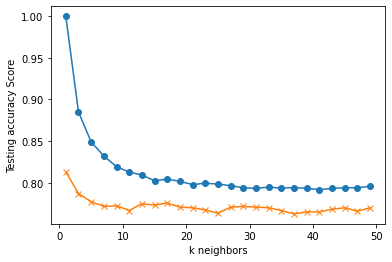

In [27]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
#number_input_features = 1199
hidden_nodes_layer1 =  6
hidden_nodes_layer2 = 2
#hidden_nodes_layer3 = 10
#hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer 

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 2)                 14        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_train_scaled.shape

(3673, 11)

In [30]:
y_train.shape

(3673,)

In [31]:
# Define the checkpoint path and filenames
#os.makedirs("checkpoints_optimized_1/",exist_ok=True)
#checkpoint_dir_1 = "checkpoints_optimized_1/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:

fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
115/115 [==============================] - 0s 848us/step - loss: 0.5610 - accuracy: 0.7885
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5211 - accuracy: 0.7887
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7887
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7887
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7887
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7887
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.7887
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.7887
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.7887
Epoch 10/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4334 - accu

115/115 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8219
Epoch 82/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8214
Epoch 83/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8209
Epoch 84/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8187
Epoch 85/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8217
Epoch 86/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8214
Epoch 87/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8209
Epoch 88/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8195
Epoch 89/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8189
Epoch 90/100
115/115 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 

In [35]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

39/39 - 0s - loss: 0.4225 - accuracy: 0.7951 - 158ms/epoch - 4ms/step
Loss: 0.42247799038887024, Accuracy: 0.795102059841156


In [36]:
# Export our model to HDF5 file
nn.save("Wine_Enthusiast_Optimization_r.h5")

In [37]:
number_input_features = len(X_train_scaled[0])
#number_input_features = 1199
hidden_nodes_layer1 =  12
hidden_nodes_layer2 = 6
hidden_nodes_layer3 = 4
#hidden_nodes_layer4 = 5

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer 

nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                144       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [38]:
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
fit_model = nn_1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
115/115 [==============================] - 0s 824us/step - loss: 0.5701 - accuracy: 0.7887
Epoch 2/100
115/115 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7887
Epoch 3/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7887
Epoch 4/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7887
Epoch 5/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.7887
Epoch 6/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.7887
Epoch 7/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7887
Epoch 8/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.7887
Epoch 9/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7887
Epoch 10/100
115/115 [==============================] - 0s 1ms/step - loss: 0.4152 - accu

115/115 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8279
Epoch 82/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8279
Epoch 83/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8274
Epoch 84/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8277
Epoch 85/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8277
Epoch 86/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8293
Epoch 87/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8271
Epoch 88/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8277
Epoch 89/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8293
Epoch 90/100
115/115 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 

In [40]:
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

39/39 - 0s - loss: 0.4016 - accuracy: 0.8024 - 129ms/epoch - 3ms/step
Loss: 0.40164920687675476, Accuracy: 0.8024489879608154


In [80]:
# Export our model to HDF5 file
nn_1.save("Wine_Enthusiast_Optimization_r_2.h5")